In [14]:
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

file_to_load4 = "citibike data_Jan-Sep 2020.csv"
file_to_load1 = "Q1.csv"
file_to_load2 = "Q2.csv"
file_to_load3 = "Q3.csv"


In [15]:
newyork_data = pd.read_csv(file_to_load4)
newyork_data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,226,1/0/1900 0:04,1/0/1900 0:08,3186,Grove St PATH,40.719586,-74.043117,3211,Newark Ave,40.721525,-74.046305,29444,Subscriber,1984,2
1,377,1/0/1900 0:16,1/0/1900 0:22,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,26305,Subscriber,1989,2
2,288,1/0/1900 0:17,1/0/1900 0:22,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,29268,Customer,1989,1
3,435,1/0/1900 0:32,1/0/1900 0:39,3195,Sip Ave,40.730897,-74.063913,3280,Astor Place,40.719282,-74.071262,29278,Customer,1969,0
4,231,1/0/1900 0:46,1/0/1900 0:50,3186,Grove St PATH,40.719586,-74.043117,3276,Marin Light Rail,40.714584,-74.042817,29276,Subscriber,1983,2


In [16]:
newyork_data.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [17]:
#Rename columns
newyork_data = newyork_data.rename(columns = {"tripduration":"Trip Duration", "starttime":"Start Time", 
                                              "stoptime":"Stop Time", "start station id":"Start Station ID", 
                                              "start station name":"Start Station Name", 
                                              "start station latitude":"Start Station Latitude", 
                                              "start station longitude":"Start Station Longitude", 
                                              "end station id":"End Station ID", 
                                              "end station name":"End Station Name", 
                                              "end station latitude":"End Station Latitute", 
                                              "end station longitude":"End Station Longitude", 
                                              "bikeid":"Bike ID", "usertype":"User Type", "birth year":"Birth Year", 
                                              "gender":"Gender"})
newyork_data.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitute,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,226,1/0/1900 0:04,1/0/1900 0:08,3186,Grove St PATH,40.719586,-74.043117,3211,Newark Ave,40.721525,-74.046305,29444,Subscriber,1984,2
1,377,1/0/1900 0:16,1/0/1900 0:22,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,26305,Subscriber,1989,2
2,288,1/0/1900 0:17,1/0/1900 0:22,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,29268,Customer,1989,1
3,435,1/0/1900 0:32,1/0/1900 0:39,3195,Sip Ave,40.730897,-74.063913,3280,Astor Place,40.719282,-74.071262,29278,Customer,1969,0
4,231,1/0/1900 0:46,1/0/1900 0:50,3186,Grove St PATH,40.719586,-74.043117,3276,Marin Light Rail,40.714584,-74.042817,29276,Subscriber,1983,2


In [18]:
newyork_data["Gender"].unique()

array([2, 1, 0])

In [19]:
count_gender = newyork_data["Gender"].value_counts()
count_gender


1    160558
2     69451
0     43738
Name: Gender, dtype: int64

In [20]:
count_gender = pd.DataFrame({"Gender":[160558, 69451, 43738]}, index = ["Male", "Female", "Unknown"])
count_gender

,Gender
Male,160558
Female,69451
Unknown,43738


In [21]:
# female_data = newyork_data.loc[newyork_data["Gender"] == 2,:]
# total_female_ride = female_data["Bike ID"].count()
# total_female_ride

In [22]:
count_gender_total = count_gender.sum()
count_gender_total

Gender    273747
dtype: int64

<IPython.core.display.Javascript object>


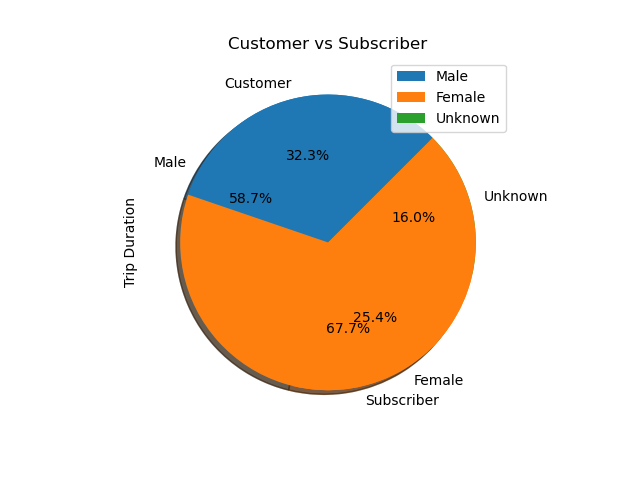

In [23]:
pie1 = count_gender.plot(kind = "pie", y = "Gender", shadow= True, startangle= 45, autopct ="%1.1f%%")
plt.title("")
plt.show()

grouped_gender = newyork_data.groupby("Gender")
count_age =grouped_gender["Bike ID"].count()
count_age

In [24]:
user_type = newyork_data.groupby("User Type")
user_type_count =user_type["Trip Duration"].count()
user_type_count.to_frame()

,Trip Duration
User Type,
Customer,88321
Subscriber,185426


In [25]:
# Percentage of customers and subscribers by comparing trip number 
pie2 = user_type_count.plot(kind = "pie", y = "Trip Duration", shadow= True, startangle= 45, autopct ="%1.1f%%")
plt.title("Customer vs Subscriber")
plt.show()

In [28]:
user_type_data = newyork_data.groupby(["User Type", "Gender"])
user_type_df = user_type_data["Trip Duration"].count()
df = user_type_df.to_frame()
df

Trip Duration
User Type  Gender               
Customer   0               41018
           1               26991
           2               20312
Subscriber 0                2720
           1              133567
           2               49139

<IPython.core.display.Javascript object>


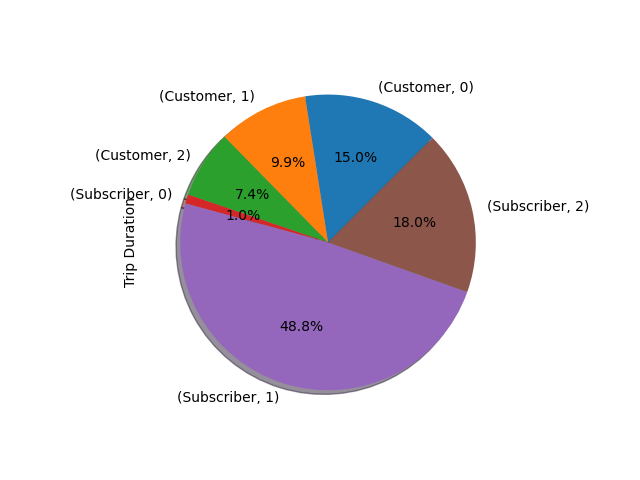

In [29]:
user_type_df.plot(kind = "pie", y = "Trip Duration", shadow= True, startangle= 45, autopct ="%1.1f%%")
plt.title("")
plt.show()

In [30]:
newyork_data.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitute,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,226,1/0/1900 0:04,1/0/1900 0:08,3186,Grove St PATH,40.719586,-74.043117,3211,Newark Ave,40.721525,-74.046305,29444,Subscriber,1984,2
1,377,1/0/1900 0:16,1/0/1900 0:22,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,26305,Subscriber,1989,2
2,288,1/0/1900 0:17,1/0/1900 0:22,3186,Grove St PATH,40.719586,-74.043117,3269,Brunswick & 6th,40.726012,-74.050389,29268,Customer,1989,1
3,435,1/0/1900 0:32,1/0/1900 0:39,3195,Sip Ave,40.730897,-74.063913,3280,Astor Place,40.719282,-74.071262,29278,Customer,1969,0
4,231,1/0/1900 0:46,1/0/1900 0:50,3186,Grove St PATH,40.719586,-74.043117,3276,Marin Light Rail,40.714584,-74.042817,29276,Subscriber,1983,2


In [31]:
rider_count_data = newyork_data[["Birth Year", "Gender", "Trip Duration"]]
rider_count_data

,Birth Year,Gender,Trip Duration
0,1984,2,226
1,1989,2,377
2,1989,1,288
3,1969,0,435
4,1983,2,231
...,...,...,...
273742,1963,2,270
273743,1984,1,400
273744,1993,1,206
273745,1966,1,216


In [34]:
data_groupby= rider_count_data.groupby("Birth Year")
data_total = data_groupby.sum()
data_total.head()

,Gender,Trip Duration
Birth Year,,
1888,0,2622
1900,2,1354
1920,1,1548
1930,4,8367
1933,4,2480


<IPython.core.display.Javascript object>


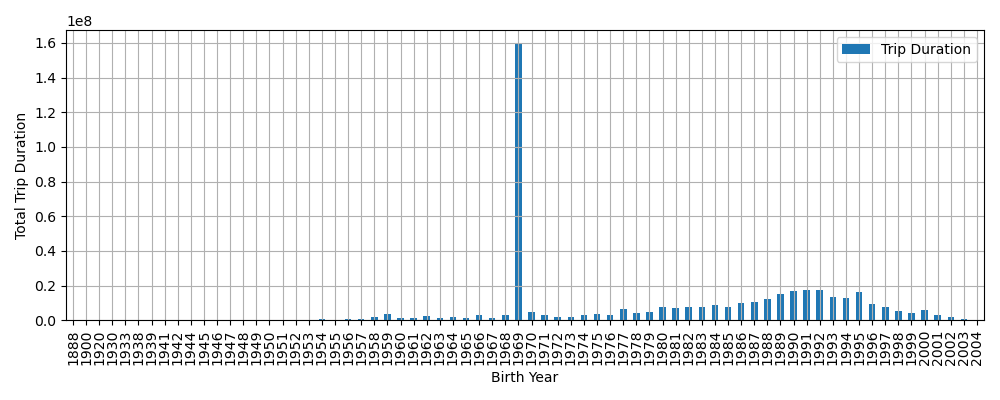

In [35]:
data_total.plot(kind ="bar", y= "Trip Duration", grid = True, figsize = (10, 4))
plt.xlabel("Birth Year")
plt.ylabel("Total Trip Duration")
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


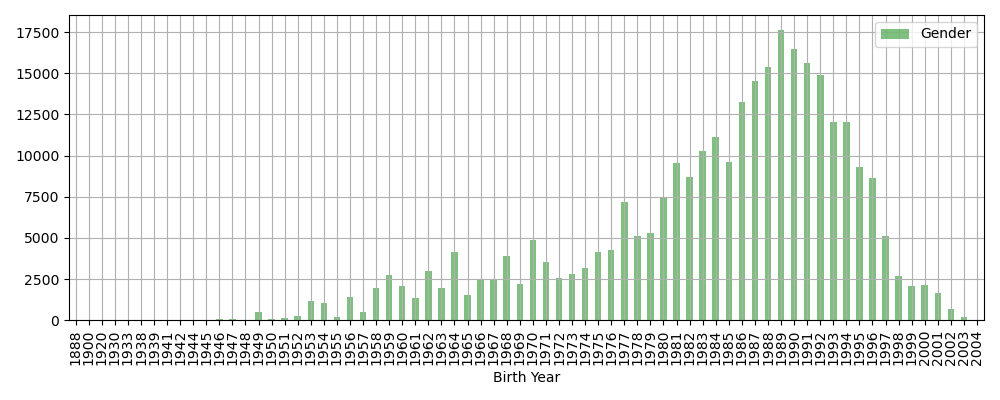

In [36]:
data_total.plot(kind ="bar", y= "Gender", color = "g", alpha = 0.5, grid = True, figsize = (10, 4))
plt.xlabel("Birth Year")
plt.show()
plt.tight_layout()

In [40]:
sp =newyork_data.loc[newyork_data["Birth Year"] == 1969, :]
v_c= sp["Gender"].value_counts()
v_c_df = v_c.to_frame()
v_c_df

,Gender
0,41919
1,1850
2,182


In [38]:
t_duration = sp["Trip Duration"].count()
t_duration

43951